# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stats 

# **Set Paths**

In [2]:
import os
BASE = os.getcwd()
DATA = os.path.join(BASE, 'datasets')
print(BASE, DATA)

c:\Users\ujjwa\Documents\VCU\Pre-Course\SCMA632\Assignments\A1\Python c:\Users\ujjwa\Documents\VCU\Pre-Course\SCMA632\Assignments\A1\Python\datasets


# **Load Main Dataset**

In [3]:
data_file_name = 'NSSO68.csv'
data_file = os.path.join(DATA, data_file_name)

df = pd.read_csv(data_file, encoding='latin1', low_memory=False, index_col='slno')

In [4]:
df.head()

,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,District,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
slno,,,,,,,,,,,,,,,,,,,,,
1,4.10E+31,1,41000,68,10,1,2,24,242,7,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
2,4.10E+31,1,41000,68,10,1,2,24,242,7,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
3,4.10E+31,1,41000,68,10,1,2,24,242,7,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
4,4.10E+31,1,41000,68,10,1,2,24,242,7,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
5,4.10E+31,1,41000,68,10,1,2,24,242,7,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


# **Drop Unnecessary Attributes**

In [5]:
# Keeping only the relevant columns
relevant_columns = [
    'state',
    'state_1', 
    'District', 
    'Region', 
    'Sector', 
    'State_Region', 
    'Meals_At_Home', 
    'ricetotal_v', 
    'wheattotal_v', 
    'Milktotal_v', 
    'pulsestot_v', 
    'nonvegtotal_v', 
    'fruitstt_v', 
    'No_of_Meals_per_day'
]

df.drop(columns=[col for col in df.columns if col not in relevant_columns], inplace=True)

# **Filter for assigned State**

In [6]:
# MEGHALAYA State Code: 17
df_meghalaya = df[df['state'] == 17]
del df

In [7]:
df_meghalaya.head()

,Sector,state,State_Region,District,No_of_Meals_per_day,Meals_At_Home,ricetotal_v,wheattotal_v,pulsestot_v,Milktotal_v,nonvegtotal_v,fruitstt_v,state_1,Region
slno,,,,,,,,,,,,,,
17686,2,17,171,6,2.0,60.0,184.666667,23.333333,106.666667,164.0,0,0,MEG,1
17687,2,17,171,6,2.0,60.0,134.000000,17.600000,55.400000,207.0,0,0,MEG,1
17688,2,17,171,6,2.0,60.0,143.000000,12.000000,42.000000,217.5,0,0,MEG,1
17689,2,17,171,6,2.0,60.0,76.666667,64.000000,62.000000,100.0,0,0,MEG,1
17690,2,17,171,6,2.0,60.0,183.000000,10.666667,34.000000,50.0,0,0,MEG,1


# **Save Filtered Dataset**

In [8]:
df_meghalaya.reset_index(inplace=True)
df_meghalaya.drop(columns=['slno'], inplace=True)
df_meghalaya.index.name = 'slno'

my_data_file_name = 'meghalaya_NSSO68.csv'
df_meghalaya.to_csv(os.path.join(DATA, my_data_file_name))

In [9]:
df_meghalaya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector               1259 non-null   int64  
 1   state                1259 non-null   int64  
 2   State_Region         1259 non-null   int64  
 3   District             1259 non-null   int64  
 4   No_of_Meals_per_day  1258 non-null   float64
 5   Meals_At_Home        1251 non-null   float64
 6   ricetotal_v          1259 non-null   float64
 7   wheattotal_v         1259 non-null   float64
 8   pulsestot_v          1259 non-null   float64
 9   Milktotal_v          1259 non-null   float64
 10  nonvegtotal_v        1259 non-null   int64  
 11  fruitstt_v           1259 non-null   int64  
 12  state_1              1259 non-null   object 
 13  Region               1259 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 137.8+ KB


# **Impute Null Values**

In [10]:
for column in df_meghalaya.columns:
    null_c = df_meghalaya[column].isnull().sum()
    if null_c > 0:
        df_meghalaya[column] = df_meghalaya[column].fillna(df_meghalaya[column].mean())
        print(f"{column}: {null_c} null values")

No_of_Meals_per_day: 1 null values
Meals_At_Home: 8 null values


In [11]:
df_meghalaya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector               1259 non-null   int64  
 1   state                1259 non-null   int64  
 2   State_Region         1259 non-null   int64  
 3   District             1259 non-null   int64  
 4   No_of_Meals_per_day  1259 non-null   float64
 5   Meals_At_Home        1259 non-null   float64
 6   ricetotal_v          1259 non-null   float64
 7   wheattotal_v         1259 non-null   float64
 8   pulsestot_v          1259 non-null   float64
 9   Milktotal_v          1259 non-null   float64
 10  nonvegtotal_v        1259 non-null   int64  
 11  fruitstt_v           1259 non-null   int64  
 12  state_1              1259 non-null   object 
 13  Region               1259 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 137.8+ KB


# **Handle Outliers in Consumption Columns**

In [12]:
consumption_columns = [
    'ricetotal_v', 
    'wheattotal_v', 
    'Milktotal_v', 
    'pulsestot_v', 
    'nonvegtotal_v', 
    'fruitstt_v'
]

In [13]:
def check_outliers():
    # Create subplots to show boxplots for each consumption column
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

    for ax, column in zip(axes.flatten(), consumption_columns):
        df_meghalaya.boxplot(column=column, ax=ax)
        ax.set_title(f'Boxplot of {column}')
        ax.set_ylabel('Consumption (kg/month)')
        ax.set_xlabel('')
        
    plt.tight_layout()

In [14]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

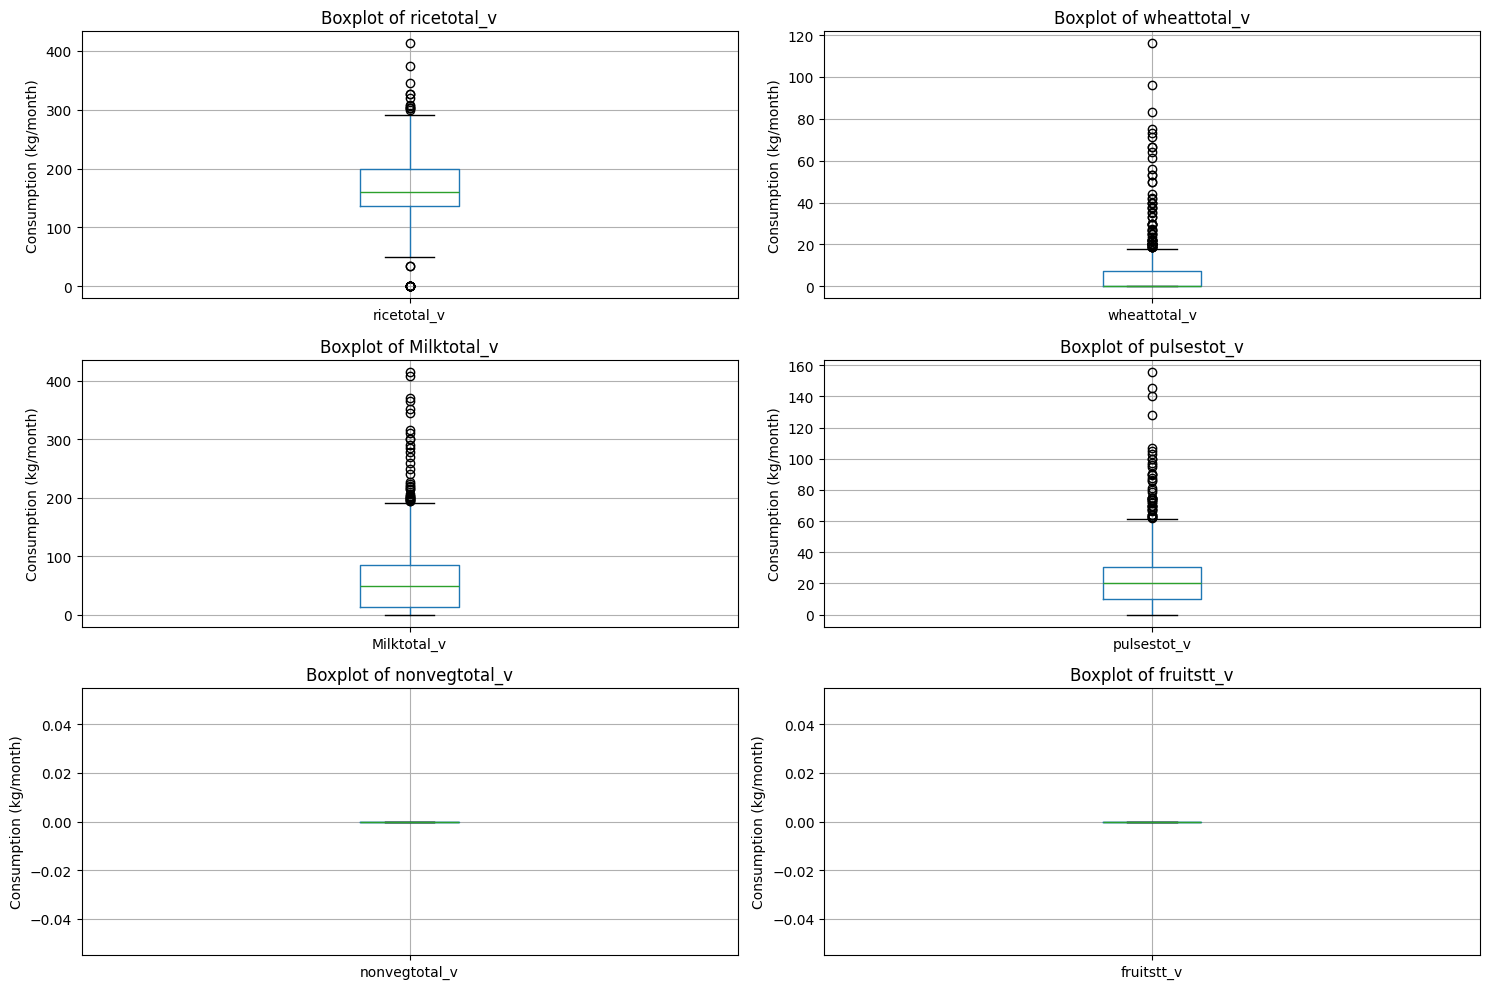

In [15]:
check_outliers()

In [16]:
for column in consumption_columns:
    df_meghalaya = remove_outliers(df_meghalaya, column)

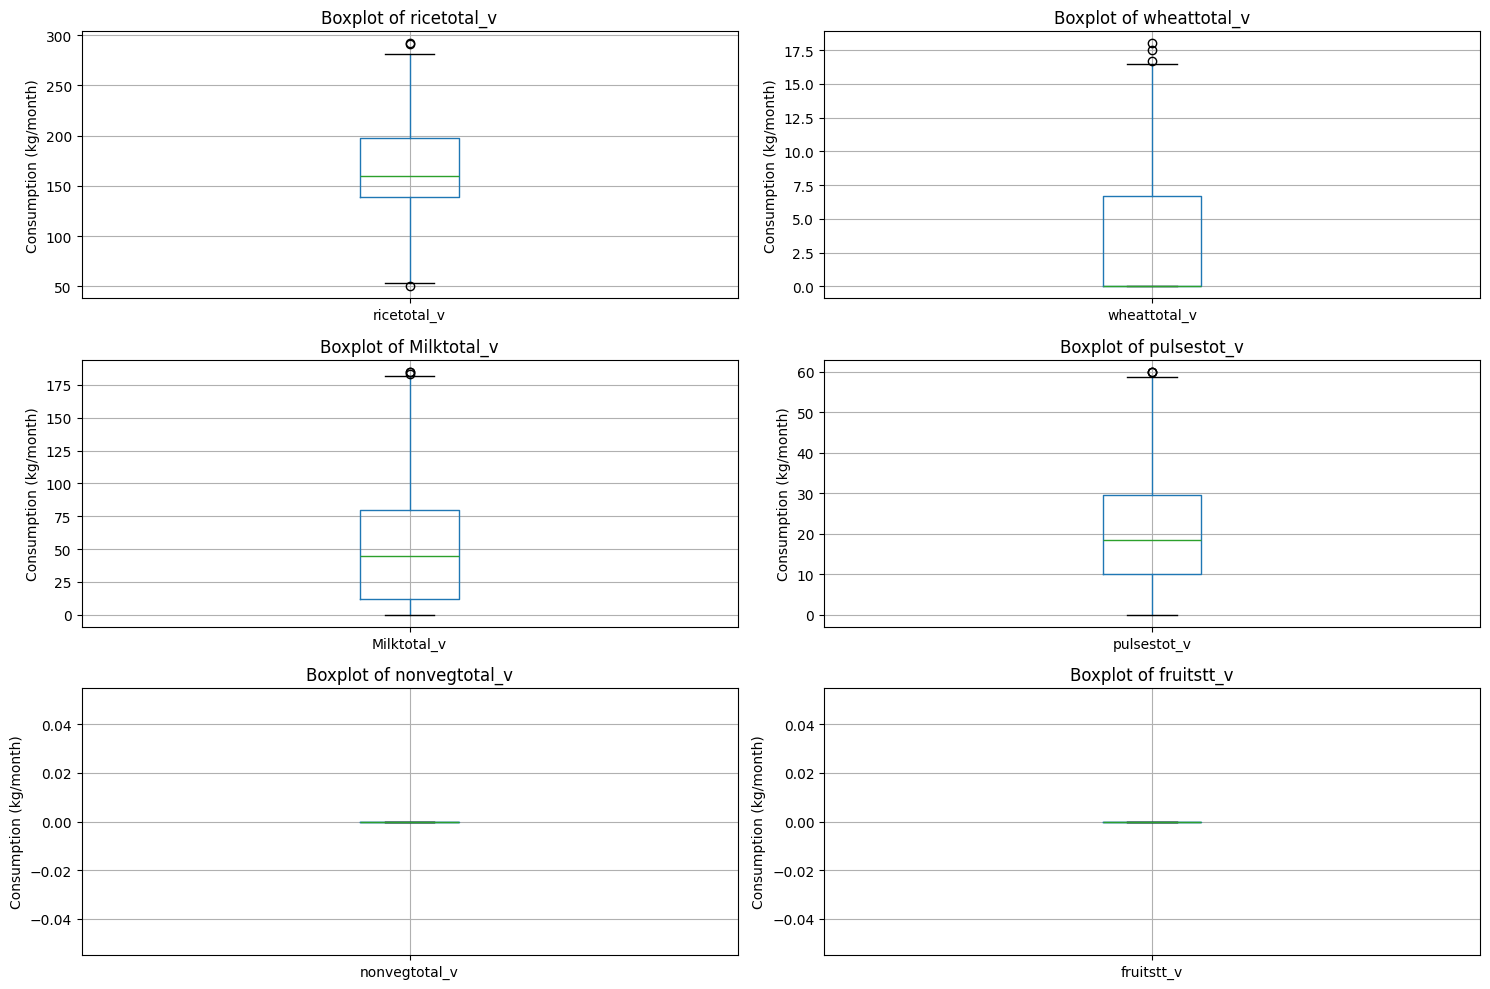

In [17]:
check_outliers()

# **Create Total Consumption Column**

In [18]:
df_meghalaya['total_consumption'] = df_meghalaya[consumption_columns].sum(axis=1)

# **Descriptive Statistics for Total Consumption by District, Region and Sector**

In [19]:
def summarize_consumption(df, column):
    summary = df.groupby(column)['total_consumption'].agg(['mean', 'std', 'count', 'sum'])
    summary.sort_values(by='sum', ascending=False, inplace=True)
    return summary

In [20]:
district = summarize_consumption(df_meghalaya, 'District')
region = summarize_consumption(df_meghalaya, 'Region')
sector = summarize_consumption(df_meghalaya, 'Sector')

In [21]:
district.head()

,mean,std,count,sum
District,,,,
6,252.803981,84.999005,278,70279.506711
1,246.921321,57.750705,217,53581.926745
4,233.520032,66.973293,156,36429.124914
7,210.077068,60.312979,150,31511.560204
5,239.591631,69.144585,123,29469.770635


In [22]:
district.tail()

,mean,std,count,sum
District,,,,
4,233.520032,66.973293,156,36429.124914
7,210.077068,60.312979,150,31511.560204
5,239.591631,69.144585,123,29469.770635
2,249.809759,57.745596,113,28228.502778
3,245.927895,53.155398,81,19920.159488


# **Map District and Sector to their Names/Labels**

In [23]:
dist_st_map = {
    1: 'West Garo Hills',
    2: 'East Garo Hills',
    3: 'South Garo Hills',
    4: 'West Khasi Hills',
    5: 'Ri Bhoi',
    6: 'East Khasi Hills',
    7: 'Jaintia Hills',
}

sector_map = {
    1: 'Rural',
    2: 'Urban'
}

df_meghalaya['District'] = df_meghalaya['District'].map(dist_st_map)
df_meghalaya['Sector'] = df_meghalaya['Sector'].map(sector_map)

In [24]:
district = summarize_consumption(df_meghalaya, 'District')
region = summarize_consumption(df_meghalaya, 'Region')
sector = summarize_consumption(df_meghalaya, 'Sector')

In [25]:
district

,mean,std,count,sum
District,,,,
East Khasi Hills,252.803981,84.999005,278,70279.506711
West Garo Hills,246.921321,57.750705,217,53581.926745
West Khasi Hills,233.520032,66.973293,156,36429.124914
Jaintia Hills,210.077068,60.312979,150,31511.560204
Ri Bhoi,239.591631,69.144585,123,29469.770635
East Garo Hills,249.809759,57.745596,113,28228.502778
South Garo Hills,245.927895,53.155398,81,19920.159488


# **Hypothesis Testing using Z-Test as n > 30**

In [26]:
urban = df_meghalaya[df_meghalaya['Sector'] == 'Urban']['total_consumption']
rural = df_meghalaya[df_meghalaya['Sector'] == 'Rural']['total_consumption']

sector_z_stat, sector_p_value = stats.ztest(urban, rural, alternative='two-sided')

In [27]:
print(sector_z_stat)
print(sector_p_value)

9.694123490133885
3.1936802464159697e-22


In [28]:
if sector_p_value < 0.05:
    print("There is a significant difference in total consumption between Urban and Rural sectors. Reject the null hypothesis.")
else:
    print("There is no significant difference in total consumption between Urban and Rural sectors. Failed to reject the null hypothesis.")

There is a significant difference in total consumption between Urban and Rural sectors. Reject the null hypothesis.


In [29]:
top_dist = df_meghalaya[df_meghalaya['District'] == district.iloc[0].name]['total_consumption']
bottom_dist = df_meghalaya[df_meghalaya['District'] == district.iloc[-1].name]['total_consumption']

dist_z_stat, dist_p_value = stats.ztest(top_dist, bottom_dist, alternative='two-sided')

In [30]:
print(dist_z_stat)
print(dist_p_value)

0.6894487608044243
0.49054090737260336


In [31]:
if dist_p_value < 0.05:
    print("There is a significant difference in total consumption between the top and bottom districts. Reject the null hypothesis.")
else:
    print("There is no significant difference in total consumption between the top and bottom districts. Failed to reject the null hypothesis.")

There is no significant difference in total consumption between the top and bottom districts. Failed to reject the null hypothesis.
